# Examen SIIA - Ralphy Núñez Mercado

"Married at First Sight" es un programa de televisión en el que parejas de desconocidos se  
casan sin haberse conocido previamente. Expertos en relaciones eligen a las parejas  
basándose en diversas características, como la compatibilidad psicológica, preferencias  
personales, atracción física y otros factores relacionados con la relación.  
Tras el matrimonio, las parejas tienen que convivir y, al final de la temporada, deciden si   
quieren continuar con su matrimonio o divorciarse.  
El fichero mafs.csv (https://www.kaggle.com/datasets/mrisdal/married-at-first-sight) tiene   
información sobre estas parejas. 
Se trata de que explores esos datos, los preproceses y   
desarrolles un modelo que nos permita saber si las parejas siguen juntas o se han separado.   
Prueba con distintos algoritmos/modelos que puedas utilizar para este tipo de problema y   
explica cada paso detalladamente en tu cuaderno de Jypyter. No te olvides de realizar   
visualizaciones y métricas de cada modelo y terminar con tus conclusiones explicando por   
qué has elegido ese en concreto. Identifica claramente cada uno de los pasos: carga,   
preprocesamiento, definición de características y objetivo, desarrollo del modelo, evaluación  
del modelo, ajustes, ...  
Al terminar sube tu solución al Aula Virtual.  
Cabecera del csv:  
Pareja, Temporada, Ubicación, Nombre, Edad, Género, Ocupación, Decisión, Estado, el resto  
de los valores son los nombres de los expertos del programa e indican si estuvieron o no en  
el programa.  
Decisión: Decisión de permanecer juntos al terminar la temporada  
Estado actual: ¿Siguen juntos?  

## Imports

In [249]:
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import  KNeighborsClassifier 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error ,r2_score,ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

# Cargando los datos del csv 

In [228]:
df = pd.read_csv('mafs.csv')

df


,Couple,Season,Location,Name,Age,Gender,Occupation,Decision,Status,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
0,1,1,New York City and Northern New Jersey,Jamie Otis-Hehner,27,F,Nurse,Yes,Married,1,1,1,1,0,0,0,0
1,1,1,New York City and Northern New Jersey,Doug Hehner,31,M,Software salesman,Yes,Married,1,1,1,1,0,0,0,0
2,2,1,New York City and Northern New Jersey,Cortney Hendrix,26,F,Make-up artist,Yes,Divorced,1,1,1,1,0,0,0,0
3,2,1,New York City and Northern New Jersey,Jason Carrion,27,M,Fireman,Yes,Divorced,1,1,1,1,0,0,0,0
4,3,1,New York City and Northern New Jersey,Monet Bell,33,F,Product development manager,No,Divorced,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,32,10,Washington D.C.,Brandon Reid,34,M,Sales Manager,No,Divorced,1,0,0,0,1,0,0,1
64,33,10,Washington D.C.,Meka Jones,25,F,Category Analyst,No,Divorced,1,0,0,0,1,0,0,1
65,33,10,Washington D.C.,Michael Watson,31,M,Education Director,Yes,Divorced,1,0,0,0,1,0,0,1
66,34,10,Washington D.C.,Mindy Shiben,34,F,Figure Skating Coach,No,Divorced,1,0,0,0,1,0,0,1


## Preprocesamiento

<p>Miro los tipos de datos con los que estoy trabajando<p>

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Couple                68 non-null     int64 
 1   Season                68 non-null     int64 
 2   Location              68 non-null     object
 3   Name                  68 non-null     object
 4   Age                   68 non-null     int64 
 5   Gender                68 non-null     object
 6   Occupation            68 non-null     object
 7   Decision              68 non-null     object
 8   Status                68 non-null     object
 9   DrPepperSchwartz      68 non-null     int64 
 10  DrLoganLevkoff        68 non-null     int64 
 11  DrJosephCilona        68 non-null     int64 
 12  ChaplainGregEpstein   68 non-null     int64 
 13  PastorCalvinRoberson  68 non-null     int64 
 14  RachelDeAlto          68 non-null     int64 
 15  DrJessicaGriffin      68 non-null     int6

<p>Usamos un LabelEncoder para poder transformar los datos a valores numericos<p>

In [230]:

categorical_features = [
    'Location','Name','Gender','Occupation','Decision','Status'
]

le = LabelEncoder()
for col in categorical_features:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
    
df


,Couple,Season,Location,Name,Age,Gender,Occupation,Decision,Status,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
0,1,1,5,26,27,0,42,1,1,1,1,1,1,0,0,0,0
1,1,1,5,19,31,1,60,1,1,1,1,1,1,0,0,0,0
2,2,1,5,10,26,0,34,1,0,1,1,1,1,0,0,0,0
3,2,1,5,29,27,1,26,1,0,1,1,1,1,0,0,0,0
4,3,1,5,47,33,0,48,0,0,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,32,10,8,8,34,1,55,0,0,1,0,0,0,1,0,0,1
64,33,10,8,42,25,0,8,0,0,1,0,0,0,1,0,0,1
65,33,10,8,44,31,1,16,1,0,1,0,0,0,1,0,0,1
66,34,10,8,45,34,0,20,0,0,1,0,0,0,1,0,0,1


## Mostrando la distribucion de la propiedad Decisión

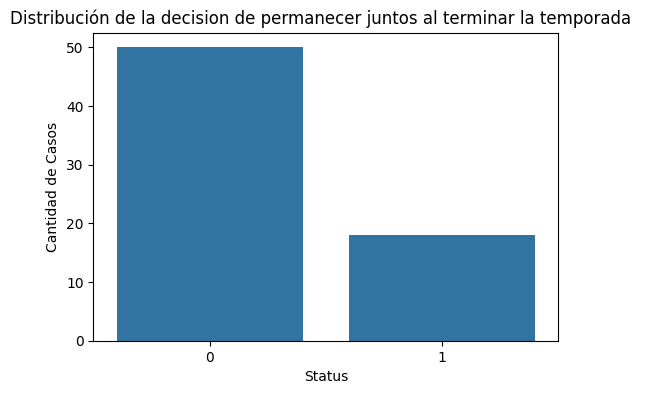

In [231]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=df)

plt.title('Distribución de la decision de permanecer juntos al terminar la temporada  ')
plt.xlabel('Status')
plt.ylabel('Cantidad de Casos')

plt.show()

<p>Separo las propiedades en X e Y<p>

<p>El objetivo de nuestro modelo es poder determinar si los concursante siguen juntos o si se han divorciado<p>

In [232]:
X = df[['Couple', 'Season','Location','Name','Age','Gender','Occupation','Decision','Status','DrPepperSchwartz','DrLoganLevkoff','DrJosephCilona','ChaplainGregEpstein','PastorCalvinRoberson','RachelDeAlto','DrJessicaGriffin','DrVivianaColes']]
y  = df['Status']

<p> Muestro un mapa de calor para poder ver la correlacion de las propiedades con Status<p>

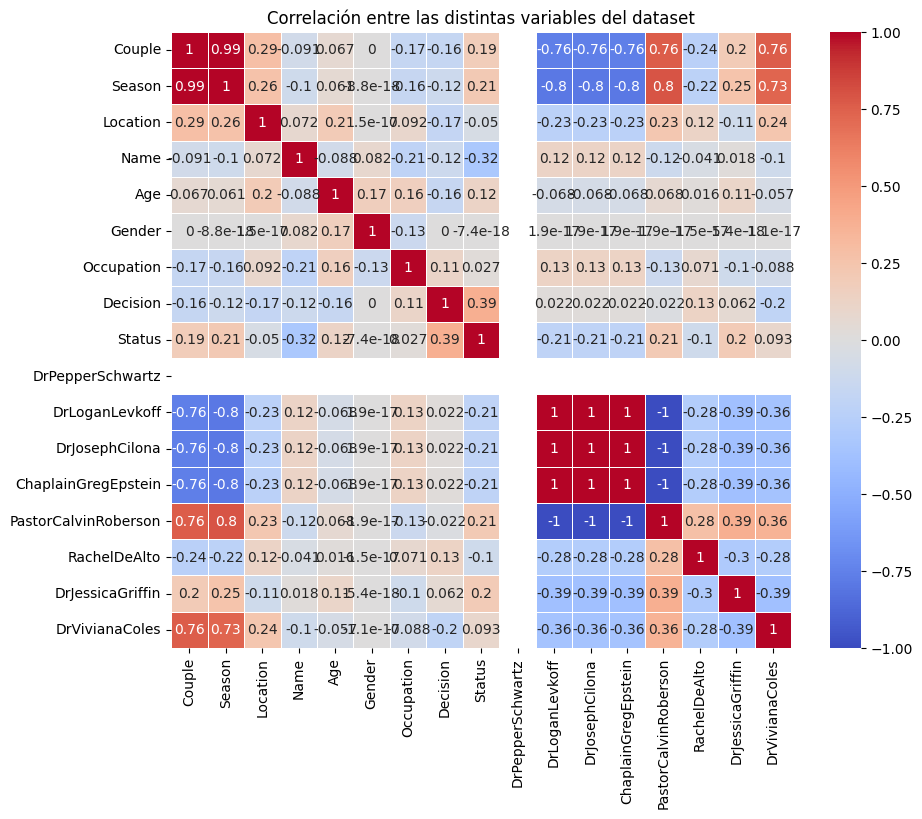

In [233]:
plt.figure(figsize=(10,8))
plt.title("Correlación entre las distintas variables del dataset")
sns.heatmap(df.corr(), linewidths=0.5, cmap="coolwarm", annot=True)
plt.show()

<p> Dividir el entrenamiento y prueba(80% entrenaiento, 20% test)<p>

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## Probar diferentes algoritmos/modelos

### Clasificador KNN con Random Search y Grid Search 

In [248]:


X_trainRandom, X_testRandom, y_trainRandom, y_testRandom = train_test_split(X, y, test_size=0.2, random_state=0)


knn = KNeighborsClassifier()

#Hiperparámetros
param_distributions = {
    'n_neighbors': range(1, 12),
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

# Random Search
random_search_knn = RandomizedSearchCV(knn, param_distributions, n_iter=44, cv=5, random_state=0)
random_search_knn.fit(X_trainRandom, y_trainRandom)

print("Mejores hiperparámetros random search:", random_search_knn.best_params_)

random_search_knn.score(X_testRandom, y_testRandom) 

prediccionesRandom = random_search_knn.predict(X_testRandom)

accuracyRandom = accuracy_score(y_testRandom, prediccionesRandom)

print(f'Precisión del clasificador k-NN con random search: {accuracyRandom:.3f}')
mse_random = mean_squared_error(y_testRandom, prediccionesRandom)
r2_lineal = r2_score(y_testRandom,prediccionesRandom)

print(f"KNN fallo cuadrático - MSE: {mse_random:.3f}")
print(f"KNN- R²: {r2_lineal:.3f}")

Mejores hiperparámetros random search: {'weights': 'uniform', 'p': 1, 'n_neighbors': 9}
Precisión del clasificador k-NN con random search: 0.500
KNN fallo cuadrático - MSE: 0.500
KNN- R²: -1.042


In [247]:
X_trainGrid, X_testGrid, y_trainGrid, y_testGrid = train_test_split(X, y, test_size=0.2, random_state=0)


knn = KNeighborsClassifier()

#Hiperparámetros
param_distributions = {
    'n_neighbors': range(1, 12),
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

#Grid Search
grid_search_knn =  GridSearchCV(knn, param_distributions, cv=5)
grid_search_knn.fit(X_trainGrid, y_trainGrid)

print("Mejor hiperparámetros grid search:", grid_search_knn.best_params_)

grid_search_knn.score(X_testGrid, y_testGrid) 

prediccionesGrid = grid_search_knn.predict(X_testGrid)

accuracyGrid = accuracy_score(y_testGrid, prediccionesGrid)

print(f'Precisión del clasificador k-NN con grid search: {accuracyGrid:.3f}')
mse_random = mean_squared_error(y_testGrid, prediccionesGrid)
r2_lineal = r2_score(y_testGrid,prediccionesGrid) 

print(f"KNN fallo cuadrático - MSE: {mse_random:.3f}")
print(f"KNN- R²: {r2_lineal:.3f}")

Mejor hiperparámetros grid search: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Precisión del clasificador k-NN con grid search: 0.500
KNN fallo cuadrático - MSE: 0.500
KNN- R²: -1.042


Conclusión: Como vemos los dos clasificadores dan exactamente el mismo resultado

### Matriz de confusión y Estadisticas

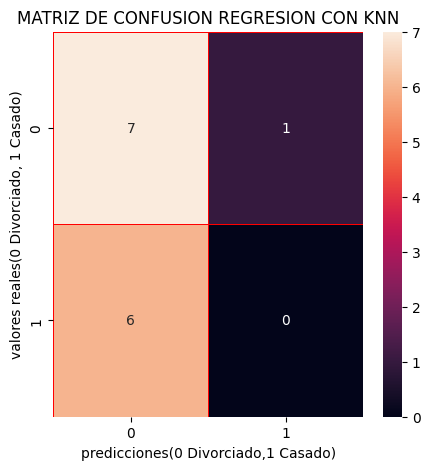

In [237]:
cm= confusion_matrix(y_testGrid,prediccionesGrid) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones(0 Divorciado,1 Casado)")
plt.ylabel("valores reales(0 Divorciado, 1 Casado)")
plt.title("MATRIZ DE CONFUSION REGRESION CON KNN")
plt.show()

In [238]:
print("Estadísticas : ")
print(classification_report(y_test,prediccionesGrid))


Estadísticas : 
              precision    recall  f1-score   support

           0       0.54      0.88      0.67         8
           1       0.00      0.00      0.00         6

    accuracy                           0.50        14
   macro avg       0.27      0.44      0.33        14
weighted avg       0.31      0.50      0.38        14



### Regresión logistica

<p>Hago la regresion logistica con Decision por que es la que mayor relacion tiene con status <p>

In [239]:
x_puntos=df[["Decision"]]
y_puntos=df["Status"]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_puntos, y_puntos, test_size=0.2, random_state=0)

# Crear el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
prediccionLogistica=modelo.predict(X_test)
# Crear un rango para la predicción de la curva sigmoide
X_range = np.linspace(x_puntos.min().values[0], x_puntos.max().values[0], 300).reshape(-1, 1)

# Convertir el rango a DataFrame con el nombre de la columna correcto
X_range_df = pd.DataFrame(X_range, columns=["Decision"])

# Predecir las probabilidades usando el DataFrame
y_prob = modelo.predict_proba(X_range_df)[:, 1]



Graficar sigmoide

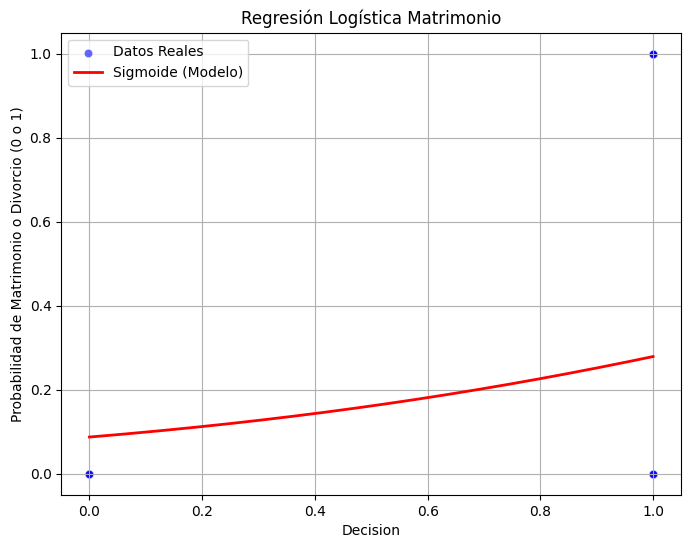

In [220]:
# Graficar los puntos reales y la curva sigmoide
plt.figure(figsize=(8,6))

# Puntos reales del dataset
sns.scatterplot(x=X_test['Decision'], y=y_test, color='blue', label="Datos Reales", alpha=0.6)

# Curva sigmoide predicha por el modelo
plt.plot(X_range, y_prob, color='red', linewidth=2, label="Sigmoide (Modelo)")

# Etiquetas y título
plt.xlabel("Decision")
plt.ylabel("Probabilidad de Matrimonio o Divorcio (0 o 1)")
plt.title("Regresión Logística Matrimonio")
plt.legend()
plt.grid(True)

Matriz de confusión Logística y Estadísticas

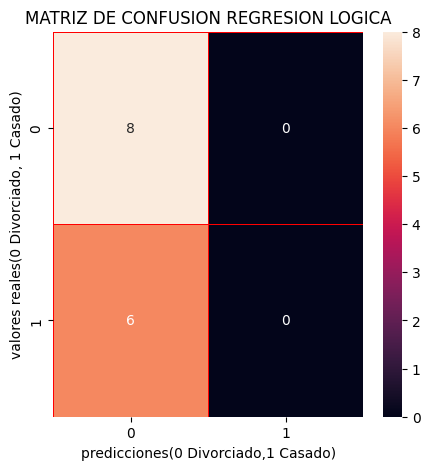

In [ ]:
cm= confusion_matrix(y_test,prediccionLogistica) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones(0 Divorciado,1 Casado)")
plt.ylabel("valores reales(0 Divorciado, 1 Casado)")
plt.title("MATRIZ DE CONFUSION REGRESION LOGISTICA")
plt.show()

In [241]:
print("Estadísticas : ")
print(classification_report(y_test,prediccionLogistica,zero_division=0.0))

Estadísticas : 
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         8
           1       0.00      0.00      0.00         6

    accuracy                           0.57        14
   macro avg       0.29      0.50      0.36        14
weighted avg       0.33      0.57      0.42        14



<p>Naïve Bayes Gaussiano<p>

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.60      1.00      0.75         6

    accuracy                           0.71        14
   macro avg       0.80      0.75      0.71        14
weighted avg       0.83      0.71      0.70        14



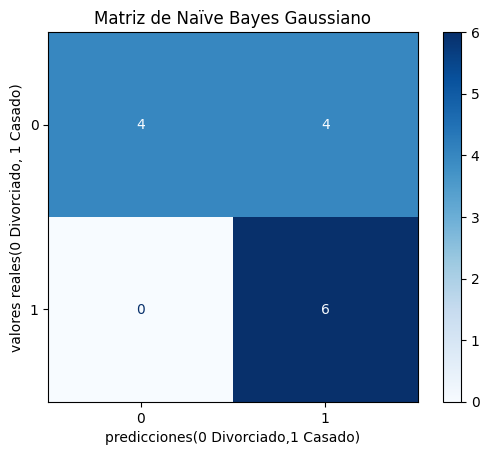

In [254]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

predicciones=gnb.predict(X_test)
report=classification_report(y_test,predicciones)
print(report)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

plt.xlabel("predicciones(0 Divorciado,1 Casado)")
plt.ylabel("valores reales(0 Divorciado, 1 Casado)")
plt.title("Matriz de Naïve Bayes Gaussiano")
plt.show()

<p> CLASIFICACIÓN SGB<p>

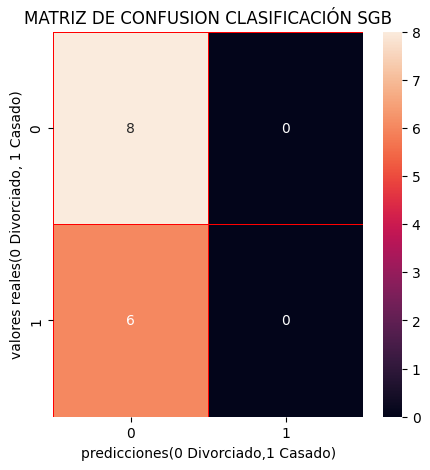

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         8
           1       0.00      0.00      0.00         6

    accuracy                           0.57        14
   macro avg       0.29      0.50      0.36        14
weighted avg       0.33      0.57      0.42        14



In [255]:


clasificador = SGDClassifier(loss='log_loss', alpha=0.01, max_iter=1000, random_state=0)
clasificador.fit(X_train, y_train)

predicciones_clas = clasificador.predict(X_test)

cm= confusion_matrix(y_test,predicciones_clas) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones(0 Divorciado,1 Casado)")
plt.ylabel("valores reales(0 Divorciado, 1 Casado)")
plt.title("MATRIZ DE CONFUSION CLASIFICACIÓN SGB")
plt.show()

# Realizar las predicciones sobre el conjunto de prueba
y_pred = clasificador.predict(X_test)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred,zero_division=0.0))